In [84]:
# Load Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy.stats import skew, kurtosis
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from dataset.dataset import SkinLesion_Dataset, SegExamples

# Load Dataset
data = SegExamples()
data[0].keys()
print(data[1]['type'])
# print(examples.seg_examples_df)
# print(data.seg_examples_df.keys())
# plt.imshow(examples[1]['img'])
# print(examples[1]['type'])

easy


In [43]:
pwd

'C:\\Users\\Lenovo\\PycharmProjects\\Skin_lesion_segmentation\\notebooks'

In [37]:
# Base k means code
paths = "../data/"+data.seg_examples_df.path
def kmeans(data):
    count = 0
    for i in paths:
        type = data[count]['type']
        img = cv2.imread(i)
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pixel_values = image.reshape(-1,3)
        pixel_values = np.float32(pixel_values)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        k = 2
        _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        centers = np.uint8(centers)
        labels = labels.flatten()
        segmented_image = centers[labels.flatten()]
        # reshape back to the original image dimension
        segmented_image = segmented_image.reshape(image.shape)
        # Save the image
        count=count+1
        cv2.imwrite(f'../examples/kmeans/{type}_{count}.png', segmented_image)

        # show the image
        plt.imshow(segmented_image, cmap="gray")
        plt.show()

## Feature Extraction

In [ ]:
# TASKS
# from the segmented image:
# the color channel r,g,b = color histogram
# mean, mode, std, skewness, energy, entropy, kurtosis
# glcm - contrast, correlation, enegry, homogenity

# extract local and global segmented image features and then compare them.

In [77]:
# Color histogram statistics -- Without segmentation
def statistics(img):
    mean1 = np.mean(img[:,:,0])
    mean2 = np.mean(img[:,:,1])
    mean3 = np.mean(img[:,:,2])
    std1 = np.std(img[:,:,0])
    std2 = np.std(img[:,:,1])
    std3 = np.std(img[:,:,2])
    # Skewness
    val1 = skew((img[:,:,0]).reshape(-1))
    val2 = skew((img[:,:,1]).reshape(-1))
    val3 = skew((img[:,:,2]).reshape(-1))
    # Kurtosis
    kval1 = kurtosis((img[:,:,0]).reshape(-1))
    kval2 = kurtosis((img[:,:,1]).reshape(-1))
    kval3 = kurtosis((img[:,:,2]).reshape(-1))

    stats = np.hstack([mean1,mean2,mean3, std1,std2,std3,val1,val2,val3,kval1,kval2,kval3])

    return stats

data = SegExamples()
binary_data = data.seg_examples_df.iloc[:60] # only nevus vs others
paths = "../data/"+binary_data.path
# Different Color Channels - RGB, LAB, YCrCb, HSV
d = []
for i in paths:
    img = cv2.imread(i)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    stats_rgb = statistics(img_rgb)
    stats_lab = statistics(img_lab)
    stats_ycrcb = statistics(img_ycrcb)
    stats_hsv = statistics(img_hsv)

    s = np.hstack([stats_rgb, stats_lab, stats_ycrcb, stats_hsv])
    d.append(s)
df = pd.DataFrame(d)
df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,152.957548,123.201837,142.867204,40.124012,38.558668,41.405691,-2.405166,-2.117362,-2.133148,4.376260,...,152.984826,5.112975,30.844412,40.103737,-3.104718,2.184447,-2.403846,109.662544,3.662936,4.371829
1,69.897526,68.952570,68.832344,90.272715,89.624970,89.758945,0.670618,0.705167,0.741186,-1.469117,...,72.993444,53.172174,21.476743,94.158973,1.099775,2.137259,0.671726,-0.419170,5.166060,-1.467697
2,146.889354,140.386319,143.898498,14.460931,19.097089,19.954223,-2.626805,-2.550633,-2.213511,7.528801,...,148.329098,62.000784,14.739541,15.139277,-0.909124,2.938837,-2.399254,-0.876696,9.256971,6.665410
3,163.266922,77.228222,69.462541,24.138502,26.699526,28.340332,-0.638417,-0.105096,0.015984,-0.049718,...,163.266922,43.164568,31.595007,24.138502,3.539004,0.191467,-0.638417,10.543414,-1.220687,-0.049718
4,157.744599,128.730520,101.354626,20.565566,25.092703,29.664500,-0.417054,0.371820,0.820824,1.032201,...,157.760130,9.977410,32.357364,20.591624,12.835444,-0.354930,-0.410338,182.736796,-0.136478,1.033886
5,173.993533,149.683663,127.065080,46.377720,50.553134,56.810535,-2.110779,-0.933605,-0.122512,4.660667,...,174.900275,35.528591,53.432233,46.379092,2.090309,0.161895,-2.091521,3.130775,-1.056765,4.673847
6,131.152698,98.561749,100.406177,81.238085,63.697932,64.132918,-0.602292,-0.326526,-0.413864,-1.172759,...,131.348772,83.866047,34.646597,81.155383,0.010621,-0.344217,-0.609406,-1.970240,-0.814004,-1.160955
7,91.505796,90.059395,92.252231,76.367755,75.386599,77.670960,-0.230758,-0.214622,-0.191362,-1.864751,...,94.428137,64.035667,14.578543,78.876602,0.335656,4.472806,-0.227758,-1.664393,31.214479,-1.857646
8,185.345484,159.234598,147.109240,34.130894,47.176144,53.230979,-1.692724,-0.831349,-0.473312,2.528976,...,185.857457,44.525159,47.166789,34.533317,2.222270,0.598328,-1.646269,3.537373,-0.586829,2.410461
9,122.592530,114.943477,109.408772,64.013960,61.389004,64.332477,-0.575712,-0.444183,-0.125425,-0.816089,...,126.666702,55.607429,39.334750,65.326427,0.728504,1.051313,-0.594528,-1.092794,1.087461,-0.765426


In [78]:
# Create labels for binary sample test dataset
binary_labels = []
for p in binary_data.path:
     binary_labels.append(p.split('/')[2])
binary_labels = pd.DataFrame(binary_labels)
label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(binary_labels[0])
df

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,label
0,152.957548,123.201837,142.867204,40.124012,38.558668,41.405691,-2.405166,-2.117362,-2.133148,4.376260,...,5.112975,30.844412,40.103737,-3.104718,2.184447,-2.403846,109.662544,3.662936,4.371829,0
1,69.897526,68.952570,68.832344,90.272715,89.624970,89.758945,0.670618,0.705167,0.741186,-1.469117,...,53.172174,21.476743,94.158973,1.099775,2.137259,0.671726,-0.419170,5.166060,-1.467697,0
2,146.889354,140.386319,143.898498,14.460931,19.097089,19.954223,-2.626805,-2.550633,-2.213511,7.528801,...,62.000784,14.739541,15.139277,-0.909124,2.938837,-2.399254,-0.876696,9.256971,6.665410,0
3,163.266922,77.228222,69.462541,24.138502,26.699526,28.340332,-0.638417,-0.105096,0.015984,-0.049718,...,43.164568,31.595007,24.138502,3.539004,0.191467,-0.638417,10.543414,-1.220687,-0.049718,0
4,157.744599,128.730520,101.354626,20.565566,25.092703,29.664500,-0.417054,0.371820,0.820824,1.032201,...,9.977410,32.357364,20.591624,12.835444,-0.354930,-0.410338,182.736796,-0.136478,1.033886,0
5,173.993533,149.683663,127.065080,46.377720,50.553134,56.810535,-2.110779,-0.933605,-0.122512,4.660667,...,35.528591,53.432233,46.379092,2.090309,0.161895,-2.091521,3.130775,-1.056765,4.673847,0
6,131.152698,98.561749,100.406177,81.238085,63.697932,64.132918,-0.602292,-0.326526,-0.413864,-1.172759,...,83.866047,34.646597,81.155383,0.010621,-0.344217,-0.609406,-1.970240,-0.814004,-1.160955,0
7,91.505796,90.059395,92.252231,76.367755,75.386599,77.670960,-0.230758,-0.214622,-0.191362,-1.864751,...,64.035667,14.578543,78.876602,0.335656,4.472806,-0.227758,-1.664393,31.214479,-1.857646,0
8,185.345484,159.234598,147.109240,34.130894,47.176144,53.230979,-1.692724,-0.831349,-0.473312,2.528976,...,44.525159,47.166789,34.533317,2.222270,0.598328,-1.646269,3.537373,-0.586829,2.410461,0
9,122.592530,114.943477,109.408772,64.013960,61.389004,64.332477,-0.575712,-0.444183,-0.125425,-0.816089,...,55.607429,39.334750,65.326427,0.728504,1.051313,-0.594528,-1.092794,1.087461,-0.765426,0


In [79]:
X = df.loc[:, df.columns != 'label']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(cf)

Accuracy: 0.55
[[ 0  9]
 [ 0 11]]


In [83]:
# Color histogram statistics -- With Segmentation
def statistics2(img, mask):
    mean1 = np.mean(mask*img[:,:,0])
    mean2 = np.mean(mask*img[:,:,1])
    mean3 = np.mean(mask*img[:,:,2])
    std1 = np.std(mask*img[:,:,0])
    std2 = np.std(mask*img[:,:,1])
    std3 = np.std(mask*img[:,:,2])
    # Skewness
    val1 = skew((mask*img[:,:,0]).reshape(-1))
    val2 = skew((mask*img[:,:,1]).reshape(-1))
    val3 = skew((mask*img[:,:,2]).reshape(-1))
    # Kurtosis
    kval1 = kurtosis((mask*img[:,:,0]).reshape(-1))
    kval2 = kurtosis((mask*img[:,:,1]).reshape(-1))
    kval3 = kurtosis((mask*img[:,:,2]).reshape(-1))

    stats = np.hstack([mean1,mean2,mean3, std1,std2,std3,val1,val2,val3,kval1,kval2,kval3])

    return stats

data = SegExamples()
binary_data = data.seg_examples_df.iloc[:60] # only nevus vs others
paths = "../data/"+binary_data.path
# Different Color Channels - RGB, LAB, YCrCb, HSV
d2 = []
for i in paths:
    img = cv2.imread(i)
    gray_seg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Segmentation
    ret1, mask = cv2.threshold(gray_seg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    mask_inv =  255 - mask;
    # result_img = mask_inv * gray_seg

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    stats_rgb = statistics2(img_rgb, mask_inv )
    stats_lab = statistics2(img_lab, mask_inv)
    stats_ycrcb = statistics2(img_ycrcb, mask_inv)
    stats_hsv = statistics2(img_hsv, mask_inv)

    s = np.hstack([stats_rgb, stats_lab, stats_ycrcb, stats_hsv])
    d2.append(s)
df2 = pd.DataFrame(d2)
df2

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,24.770411,27.896785,26.409907,67.724686,75.619460,71.670324,2.426904,2.358285,2.367752,4.038746,...,24.760196,30.619783,39.957617,67.695251,2.384937,2.447835,2.426744,3.877101,4.210865,4.037790
1,123.988319,124.061171,123.823981,124.773102,124.796811,124.606907,0.023105,0.021402,0.023231,-1.983326,...,123.766553,39.995033,64.067384,124.578819,2.921793,2.758659,0.024305,7.123877,5.700894,-1.982056
2,12.929833,14.715997,14.512580,42.066316,47.900584,47.194650,2.996200,3.000917,2.990584,7.156278,...,12.909904,42.259567,57.949566,42.002726,4.508397,3.010475,2.996628,20.999602,7.276369,7.160364
3,54.355426,98.274730,102.546748,57.677017,102.150481,106.584392,0.219739,0.090514,0.089981,-1.735582,...,54.355426,124.804038,40.655801,57.677017,0.227633,0.359601,0.219739,-1.934388,-1.501478,-1.735582
4,74.336721,96.289073,116.185488,51.835324,66.300403,79.853209,-0.581627,-0.672813,-0.692506,-1.283048,...,74.336721,112.601706,73.605949,51.835324,-0.788184,-0.487182,-0.581627,-1.376033,-1.331787,-1.283048
5,35.276887,43.163233,49.060208,67.435024,78.521631,88.024132,1.780465,1.404651,1.292939,2.151891,...,35.097136,93.177238,57.283045,67.061732,1.552552,2.268700,1.781592,0.497247,4.633370,2.173017
6,56.033113,57.634576,57.493218,100.389164,102.501152,102.308308,1.284592,1.242738,1.245925,-0.255674,...,56.001938,43.305401,54.396990,100.348581,4.309270,2.837369,1.285468,19.238834,6.236885,-0.252636
7,88.139741,88.193280,88.117950,118.943803,118.991737,118.933066,0.619766,0.618747,0.620422,-1.596902,...,88.074583,29.752554,46.037056,118.884384,5.631406,4.710997,0.620916,32.856116,20.237235,-1.594615
8,30.153452,41.854512,46.646099,54.192599,73.027768,80.698609,1.480780,1.273833,1.213606,0.757731,...,30.151395,107.217205,62.374486,54.188818,1.141207,1.420648,1.480809,-0.692829,0.498366,0.757983
9,65.063763,66.829365,68.376371,96.881095,98.722263,100.887021,0.914139,0.875529,0.861177,-0.970842,...,64.327739,93.505049,82.599272,95.841018,1.295474,1.259961,0.926668,-0.161944,-0.221101,-0.925959


In [91]:
# Create labels for binary sample test dataset
binary_labels = []
for p in binary_data.path:
     binary_labels.append(p.split('/')[2])
binary_labels = pd.DataFrame(binary_labels)
label_encoder = preprocessing.LabelEncoder()
df2['label'] = label_encoder.fit_transform(binary_labels[0])

X = df2.loc[:, df2.columns != 'label']
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(cf)

Accuracy: 0.55
[[ 0  9]
 [ 0 11]]


(array([3.2517e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

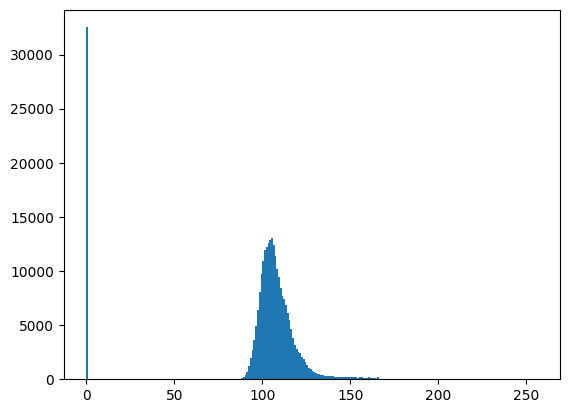

In [17]:
# plt.hist(result_img.ravel(),256,[0,256])